In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from random import uniform
import requests
import time
import json
# Import API key

from config import api_key
#print(api_key)



#from config import api_key

# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
citylats = []
citylngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        citylats.append(lat_lng[0])
        citylngs.append(lat_lng[1])
        # Print the city count to confirm sufficient count
print(f"There are {len(cities)} cities saved")
print(f"There are {len(citylats)} lats saved")

There are 606 cities saved
There are 606 lats saved


In [3]:

city_df = pd.DataFrame({'cities':cities})

city_df['Latitude'] = ""
city_df['Temperature'] = ""
city_df['Humidity'] = ""
city_df['Cloudiness (%)'] = ""
city_df['Wind Speed (mph)'] = ""


city_df


,cities,Latitude,Temperature,Humidity,Cloudiness (%),Wind Speed (mph)
0,tumannyy,,,,,
1,illoqqortoormiut,,,,,
2,rikitea,,,,,
3,ushuaia,,,,,
4,port alfred,,,,,
5,nizhneyansk,,,,,
6,mergui,,,,,
7,pevek,,,,,
8,atasu,,,,,
9,padang,,,,,


In [15]:
# OpenWeatherMap API Key
#api_key = api_key.api_keys

# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

# Adding len (cities) to a variable
cities_count = len(cities)

#Creating Counters to keep track of cities with temp info and cities without temp info
#city_with_temp_info = 0
#city_without_info = 0

cities_data = []

#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)


# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

city_without_info = []      
            
            
            
            # OpenWeatherMap API Key
import json
row_count=1
#city_without_info = 0
#api_key = api_keys.api_key
# Starting URL for Weather Map API Call
for city in cities[:600]: #everything up to the 10th value. The slice operation.
    
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    response = requests.get(url).json()
    #print(json.dumps(response,indent=4,sort_keys=True))
    print("------------------------")
    
    print(url)
    try:
        Lat=response['coord']['lat']
        Temperature=response['main']['temp']
        Humidity=response['main']['humidity']
        Cloudiness=response['clouds']['all']
        Wind=response['wind']['speed']
        cities_data.append([city,Lat,Temperature, Cloudiness, Wind])
    except(KeyError):
        city_without_info.append(city)
        print("Cityn Not found because of missing info... skip.")
cities_data   

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=tumannyy
Cityn Not found because of missing info... skip.
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=illoqqortoormiut
Cityn Not found because of missing info... skip.
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=rikitea
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=ushuaia
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=port alfred
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=nizhneyansk
Cityn Not found because of missing info... skip.
-------------------

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=yining
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=dikson
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=albany
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=norman wells
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=meadow lake
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=khandyga
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=leningradskiy
------------------------
http://api

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=ponta do sol
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=keetmanshoop
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=kangaatsiaq
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=carnarvon
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=vityazevo
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=mazara del vallo
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=hilo
------------------------

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=constitucion
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=christchurch
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=alta floresta
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=caceres
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=vaitupu
Cityn Not found because of missing info... skip.
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=bathsheba
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f7

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=auki
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=grand river south east
Cityn Not found because of missing info... skip.
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=aguada de pasajeros
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=pervomayskiy
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=ustka
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=iringa
Cityn Not found because of missing info... skip.
------------------------
http://api.openweathermap.org/data/

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=bredasdorp
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=santa isabel
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=ancud
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=marihatag
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=bajil
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=gus-khrustalnyy
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=talnakh
------------------------
http://ap

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=ilulissat
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=egvekinot
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=iquitos
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=mayskiy
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=monastyrshchina
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=katangli
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=lisakovsk
------------------------
http://a

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=qandala
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=abu samrah
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=baturaja
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=nuevitas
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=tiznit
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=havre-saint-pierre
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=uppiliapuram
Cityn Not found because of m

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=praia da vitoria
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=tateyama
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=vernon
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=timmins
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=mount isa
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=tinskoy
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=prykolotne
------------------------
http://ap

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=hvide sande
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=kloulklubed
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=boddam
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=puerto madero
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=ahipara
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=pietarsaari
Cityn Not found because of missing info... skip.
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f74

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=palmer
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=wulanhaote
Cityn Not found because of missing info... skip.
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=puqi
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=dabat
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=znamenskoye
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=adre
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=krutinka


[['rikitea', -23.12, 71.49, 76, 4],
 ['ushuaia', -54.81, 42.8, 75, 24.16],
 ['port alfred', -33.59, 62.31, 0, 17.87],
 ['pevek', 69.7, 19.69, 48, 3.56],
 ['atasu', 48.68, 40.17, 56, 13.35],
 ['padang', -0.92, 82.24, 88, 3.33],
 ['east london', -33.02, 59, 0, 9.17],
 ['tuktoyaktuk', 69.44, 14, 75, 8.05],
 ['bichura', 50.59, 30.18, 88, 6.08],
 ['mahibadhoo', 3.78, 84.18, 12, 8.59],
 ['kapaa', 22.08, 73.2, 20, 10.29],
 ['warragul', -38.16, 45.21, 0, 3.06],
 ['kaitangata', -46.28, 44.17, 0, 2.28],
 ['jacareacanga', -6.22, 86.88, 20, 2.55],
 ['vallenar', -28.58, 71.85, 0, 3],
 ['samarai', -10.62, 77.52, 68, 8.25],
 ['port augusta', -32.49, 59, 0, 9.17],
 ['ngunguru', -35.62, 57.49, 0, 7.31],
 ['upernavik', 72.79, 23.92, 44, 15.86],
 ['kununurra', -15.77, 77, 8, 5.57],
 ['manggar', -2.88, 79.68, 76, 5.53],
 ['tuatapere', -46.13, 47.19, 12, 4.07],
 ['husavik', 50.56, 45.21, 0, 10.27],
 ['cape town', -33.93, 73.4, 0, 10.29],
 ['muroto', 33.37, 55.42, 0, 6.64],
 ['ranong', 9.96, 81.3, 92, 3.62]

In [16]:
city_without_info

['tumannyy',
 'illoqqortoormiut',
 'nizhneyansk',
 'mergui',
 'barentsburg',
 'bengkulu',
 'taolanaro',
 'belushya guba',
 'karaul',
 'attawapiskat',
 'aflu',
 'umzimvubu',
 'maghama',
 'balimo',
 'grande-riviere',
 'riaba',
 'palabuhanratu',
 'tsihombe',
 'ascension',
 'burica',
 'kamenskoye',
 'samusu',
 'aporawan',
 'vaitupu',
 'fevralsk',
 'mrirt',
 'jibuti',
 'maarianhamina',
 'marcona',
 'grand river south east',
 'iringa',
 'amderma',
 'bac can',
 'litoral del san juan',
 'kazalinsk',
 'temaraia',
 'chokwe',
 'camana',
 'zyryanovskiy',
 'rawah',
 'mys shmidta',
 'saryshagan',
 'chagda',
 'tres barras',
 'pemangkat',
 'sentyabrskiy',
 'uppiliapuram',
 'nguiu',
 'hakvik',
 'wahran',
 'safwah',
 'satitoa',
 'doctor pedro p. pena',
 'tres lagoas',
 'pietarsaari',
 'waspan',
 'ransang',
 'linguere',
 'maridi',
 'wulanhaote']

In [17]:
#Create a dataframe
cities_data_df = pd.DataFrame(cities_data,columns = ['city','Lat','Temperature', 'Cloudiness', 'Wind'])
cities_data_df

,city,Lat,Temperature,Cloudiness,Wind
0,rikitea,-23.12,71.49,76,4.00
1,ushuaia,-54.81,42.80,75,24.16
2,port alfred,-33.59,62.31,0,17.87
3,pevek,69.70,19.69,48,3.56
4,atasu,48.68,40.17,56,13.35
5,padang,-0.92,82.24,88,3.33
6,east london,-33.02,59.00,0,9.17
7,tuktoyaktuk,69.44,14.00,75,8.05
8,bichura,50.59,30.18,88,6.08
9,mahibadhoo,3.78,84.18,12,8.59


In [4]:
# OpenWeatherMap API Key
#api_key = api_key.api_keys

# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

# Adding len (cities) to a variable
cities_count = len(cities)

#Creating Counters to keep track of cities with temp info and cities without temp info
#city_with_temp_info = 0
#city_without_info = 0


#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

            
            
            
            
            # OpenWeatherMap API Key
import json
row_count=1
#city_without_info = 0
#api_key = api_keys.api_key
# Starting URL for Weather Map API Call
for index,row in city_df.iterrows():
    city = row['cities']
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "&q=" + city
    response = requests.get(url).json()
    #print(json.dumps(response,indent=4,sort_keys=True))
    print("------------------------")
    print("Proceesing:#%s: %s" % (index + 1, city_df.loc[index,"cities"]))
    print(url)
    try:
        clean_cities_df.loc[index,'Lat']=response['coord']['lat']
        clean_cities_df.loc[index,'Temperature']=response['main']['temp']
        clean_cities_df.loc[index,'Humidity']=response['main']['humidity']
        clean_cities_df.loc[index,'Cloudiness (%)']=response['clouds']['all']
        clean_cities_df.loc[index,'Wind Speed (mph)']=response['wind']['speed']
    except(KeyError):
        
        print("Cityn Not found because of missing info... skip.")
        row_count += 1
        if cities_count-row_count < 510:
            break

------------------------
Proceesing:#1: tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=tumannyy
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#2: illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=illoqqortoormiut
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#3: rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=rikitea
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#4: ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=ushuaia
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#5: port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=port alfred
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#6: nizhneyansk
http://api.openweathermap.org/data/2.5/w

------------------------
Proceesing:#47: taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=taolanaro
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#48: pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=pangnirtung
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#49: el sauce
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=el sauce
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#50: bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=bethel
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#51: belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=belushya guba
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#52: bud
http://api.openweathermap.org/data/2.5/weather

------------------------
Proceesing:#94: chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=chokurdakh
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#95: dinghai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=dinghai
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#96: luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=luanda
Cityn Not found because of missing info... skip.


In [19]:
cities_data_df['Temperature'].replace('', np.nan, inplace=True)
cities_data_df['Lat'].replace('', np.nan, inplace=True)

cities_data_df

,city,Lat,Temperature,Cloudiness,Wind
0,rikitea,-23.12,71.49,76,4.00
1,ushuaia,-54.81,42.80,75,24.16
2,port alfred,-33.59,62.31,0,17.87
3,pevek,69.70,19.69,48,3.56
4,atasu,48.68,40.17,56,13.35
5,padang,-0.92,82.24,88,3.33
6,east london,-33.02,59.00,0,9.17
7,tuktoyaktuk,69.44,14.00,75,8.05
8,bichura,50.59,30.18,88,6.08
9,mahibadhoo,3.78,84.18,12,8.59


In [20]:
city_cleanedversion_df=cities_data_df.dropna().reset_index(drop=True)
city_cleanedversion_df

,city,Lat,Temperature,Cloudiness,Wind
0,rikitea,-23.12,71.49,76,4.00
1,ushuaia,-54.81,42.80,75,24.16
2,port alfred,-33.59,62.31,0,17.87
3,pevek,69.70,19.69,48,3.56
4,atasu,48.68,40.17,56,13.35
5,padang,-0.92,82.24,88,3.33
6,east london,-33.02,59.00,0,9.17
7,tuktoyaktuk,69.44,14.00,75,8.05
8,bichura,50.59,30.18,88,6.08
9,mahibadhoo,3.78,84.18,12,8.59


In [22]:
# Save data to a CSV file
city_cleanedversion_df.to_csv("City_Data.csv")

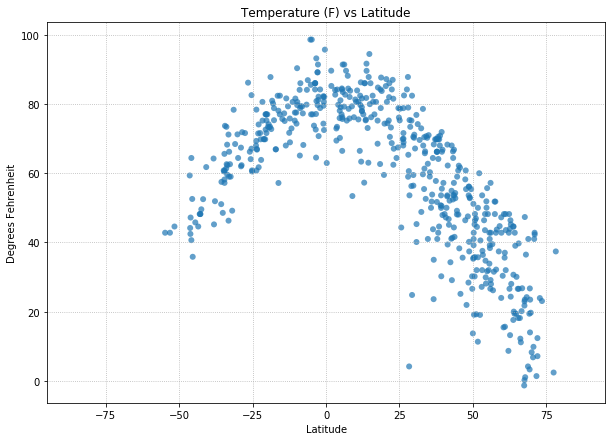

In [29]:
# Build a scatter plot for each data type
plt.figure(figsize=(10,7))
plt.scatter(city_cleanedversion_df["Lat"], city_cleanedversion_df["Temperature"], edgecolor="none", linewidths=0.5, marker="o", alpha=0.70)
# Incorporate the other graph properties
plt.title("Temperature (F) vs Latitude")
plt.ylabel("Degrees Fehrenheit")
plt.xlabel("Latitude")
plt.grid(linestyle='dotted')
plt.xlim([-95, 95])

# Save the figure
plt.savefig("Temperature vs Latitude.png")

plt.show()

In [ ]:
print(row_count)

In [ ]:
# Create new DF with only cities that have temperature data
cities_with_temp_df = city_df.dropna(subset=['Temperature'])
cities_with_temp_df